In [1]:
import model

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage.transform as trans

In [3]:
# load_model
model = model.cnn_bt()

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 32)        0

In [4]:
model.load_weights("weights.hdf5")

In [8]:
successive_outputs = [layer.output for layer in model.layers[1:]]

In [11]:
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

In [38]:
img = cv2.imread('y51.jpg', cv2.IMREAD_GRAYSCALE)
img = trans.resize(img,(256,256))

In [39]:
x   = img_to_array(img) 

In [42]:
x   = x.reshape((1,) + x.shape)

In [43]:
x.shape

(1, 256, 256, 1)

In [44]:
x /= 255.0

In [45]:
successive_feature_maps = visualization_model.predict(x)

In [47]:
layer_names = [layer.name for layer in model.layers]

(1, 128, 128, 32)


C:\Users\Nirma\AppData\Local\Temp/ipykernel_20288/1503575212.py:10: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()
C:\Users\Nirma\AppData\Local\Temp/ipykernel_20288/1503575212.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure( figsize=(scale * n_features, scale) )


(1, 128, 128, 32)
(1, 128, 128, 32)
(1, 64, 64, 32)
(1, 64, 64, 32)
(1, 64, 64, 64)
(1, 32, 32, 64)
(1, 32, 32, 64)
(1, 65536)
(1, 128)
(1, 128)
(1, 1)


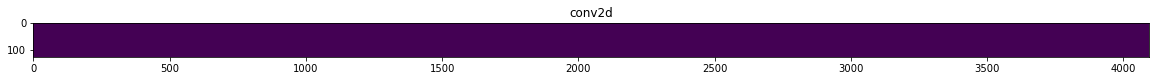

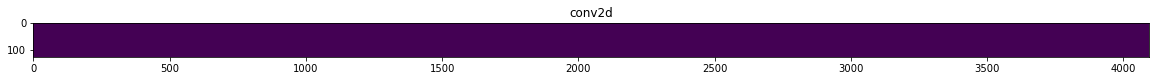

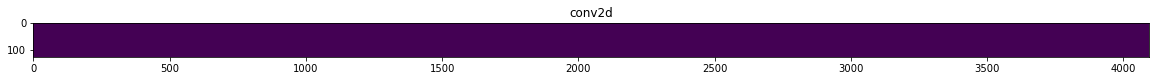

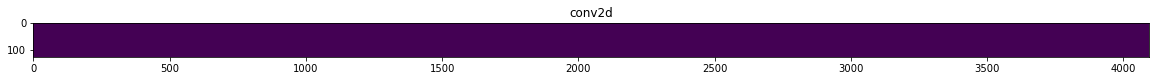

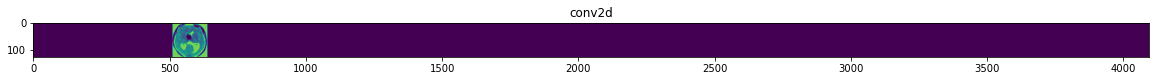

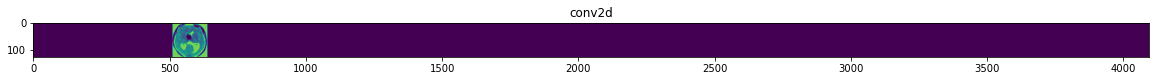

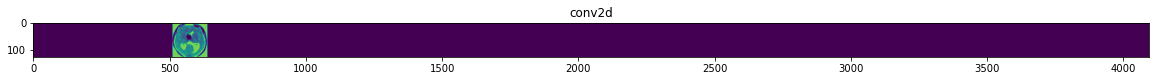

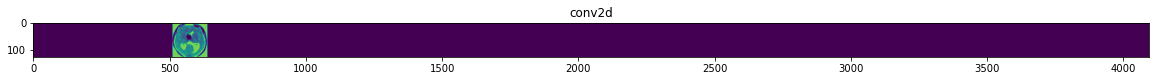

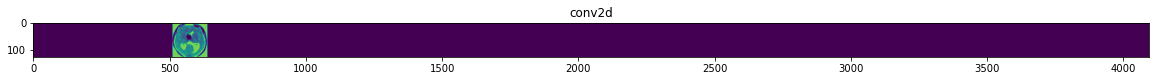

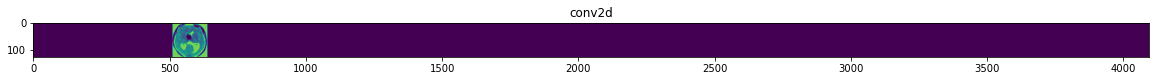

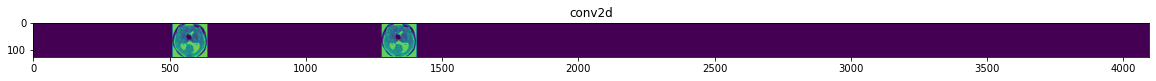

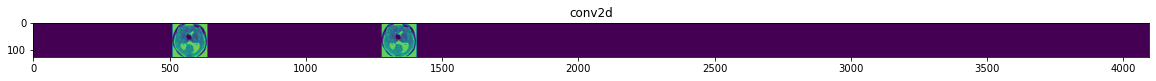

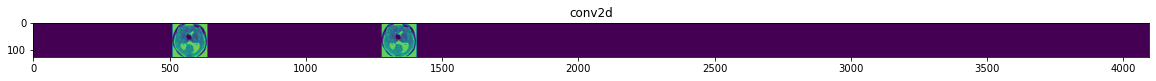

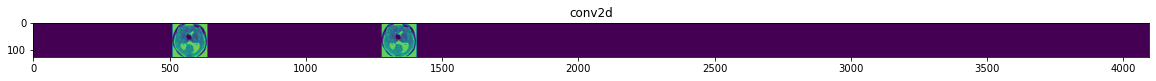

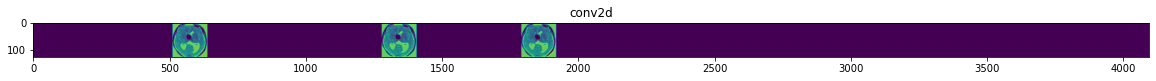

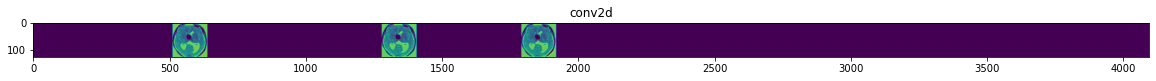

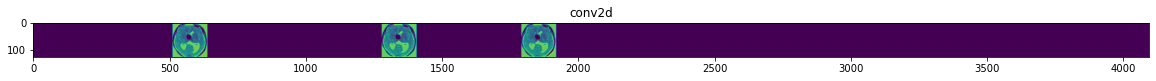

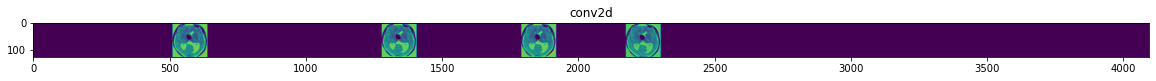

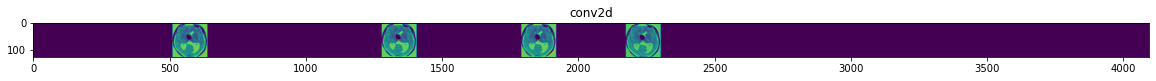

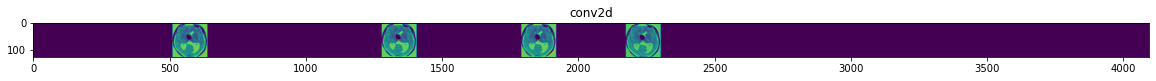

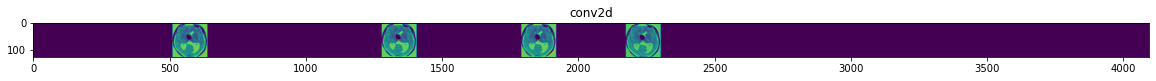

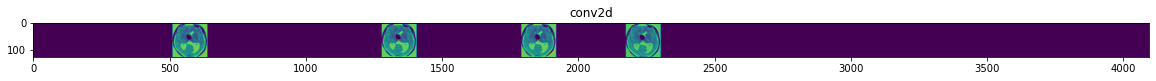

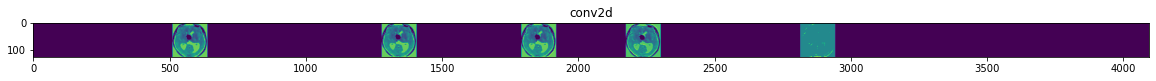

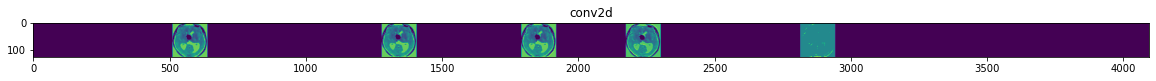

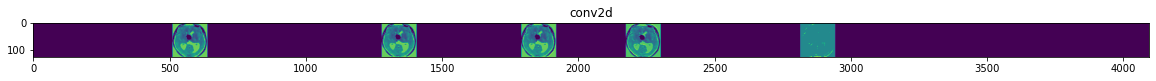

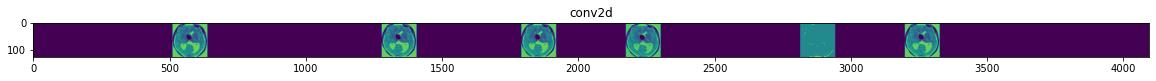

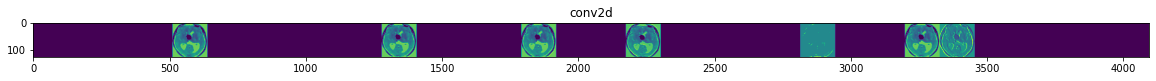

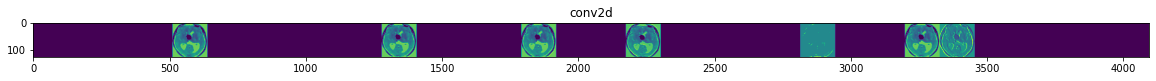

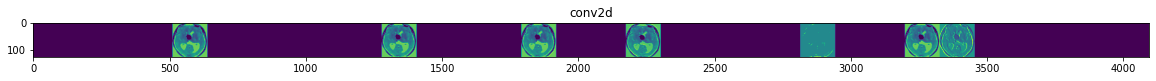

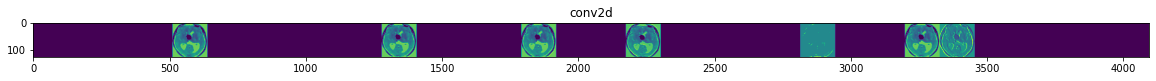

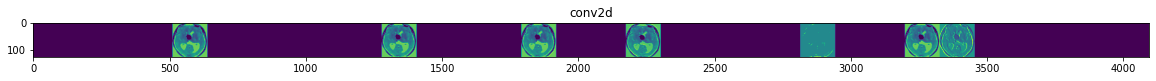

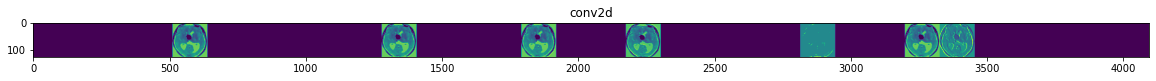

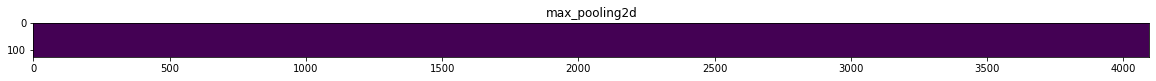

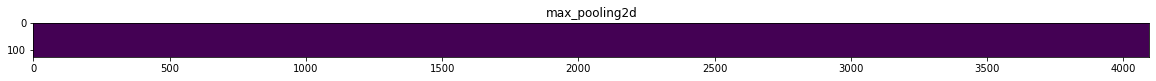

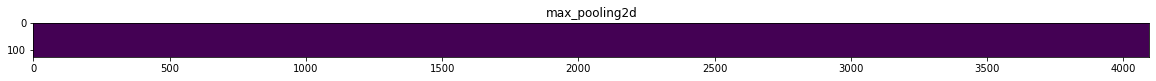

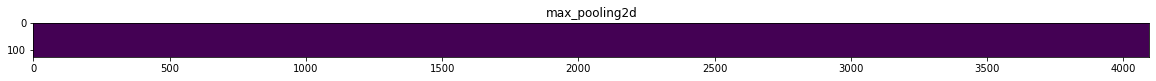

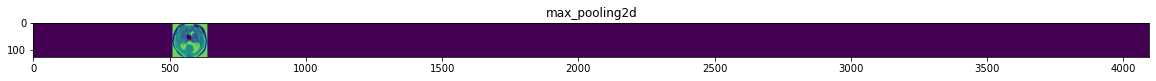

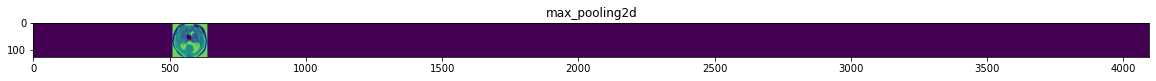

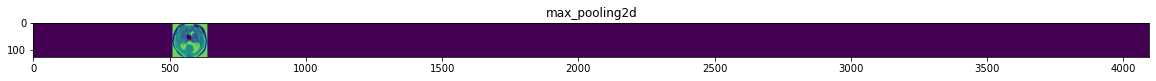

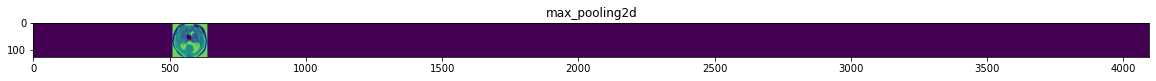

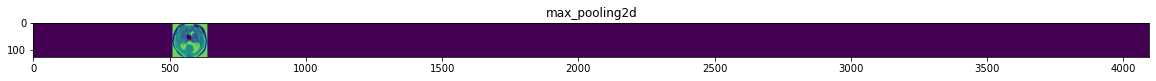

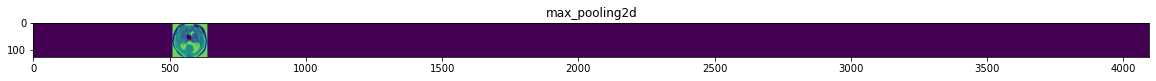

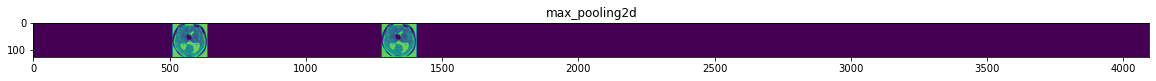

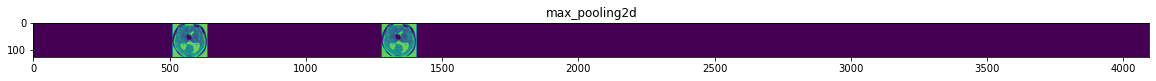

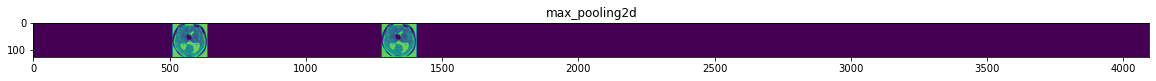

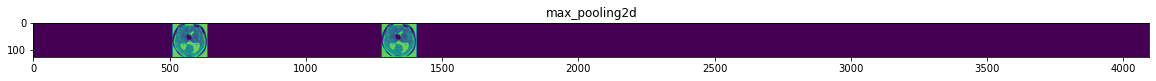

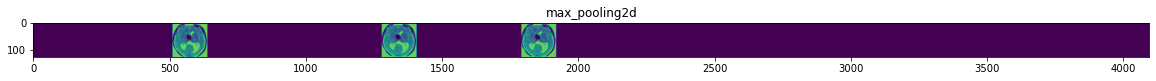

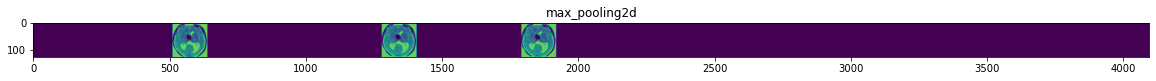

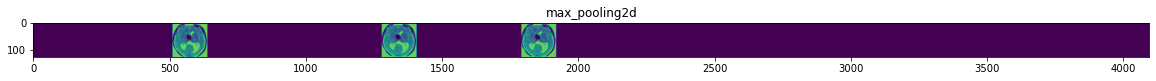

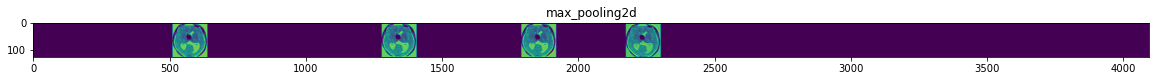

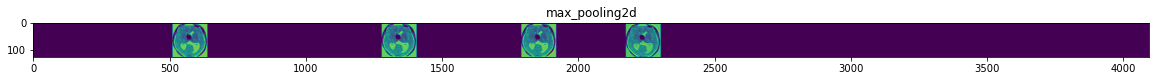

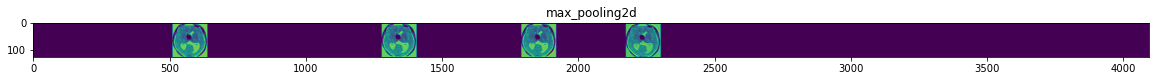

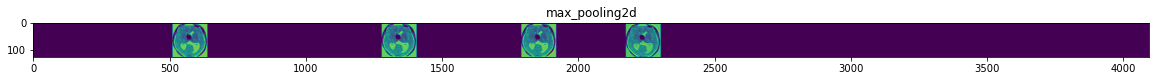

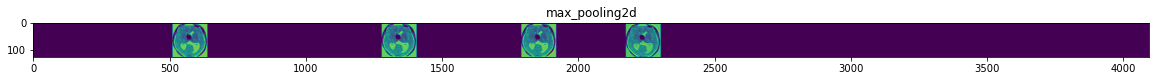

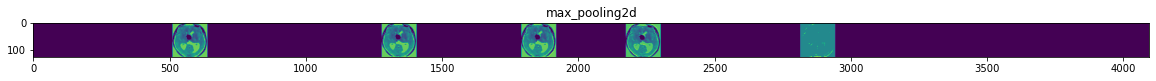

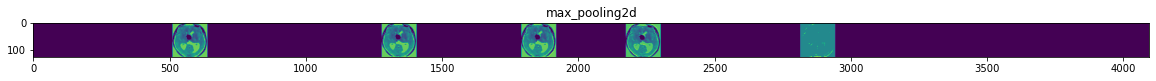

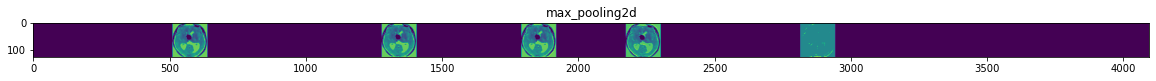

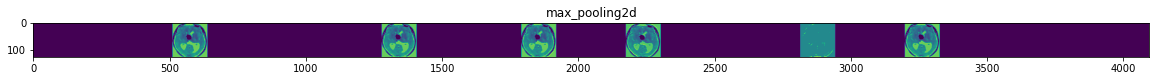

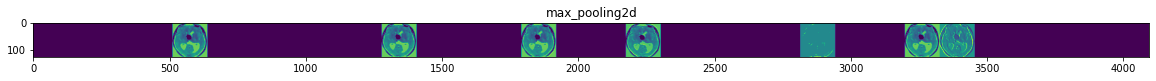

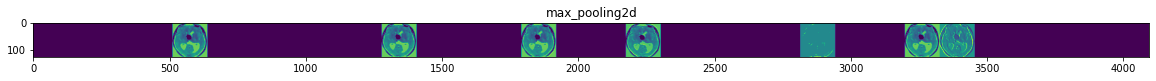

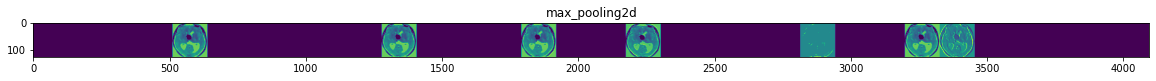

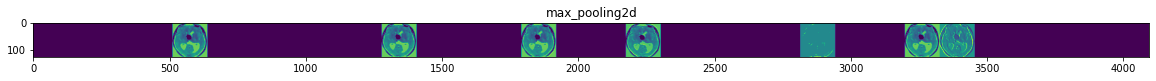

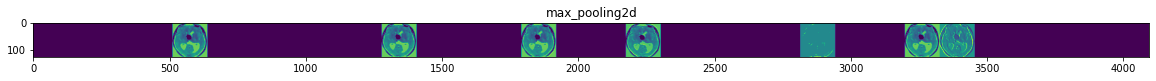

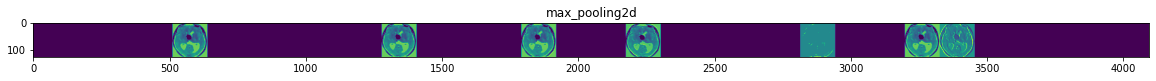

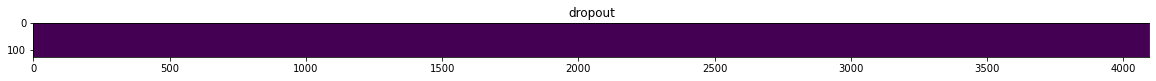

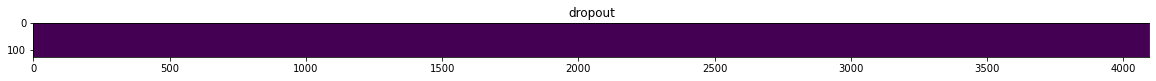

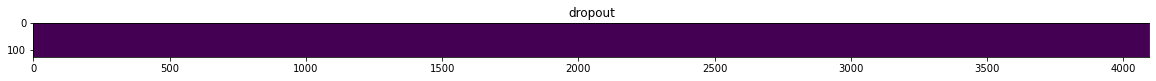

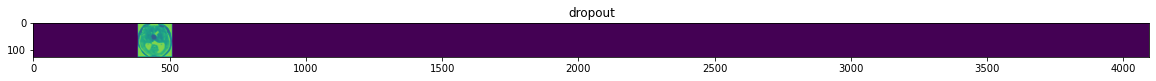

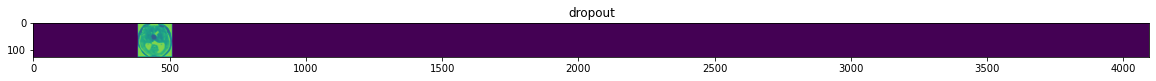

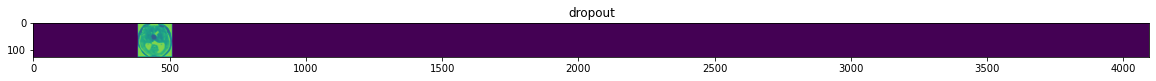

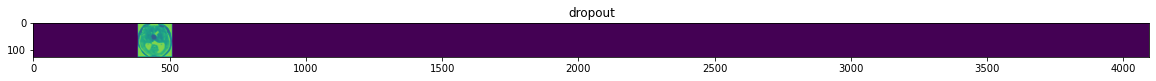

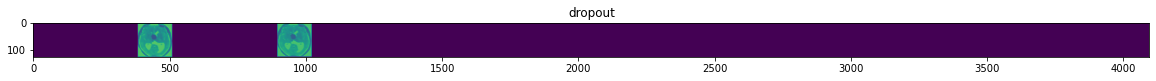

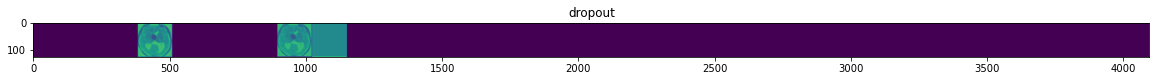

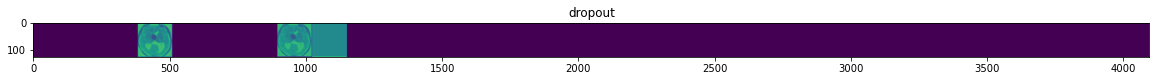

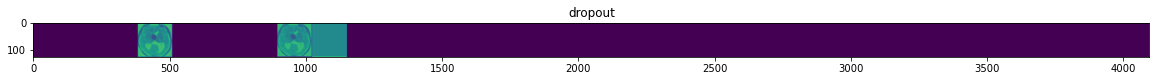

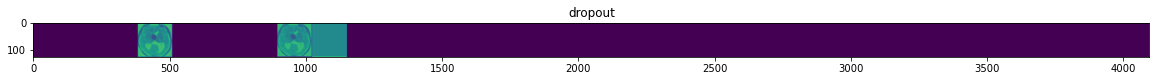

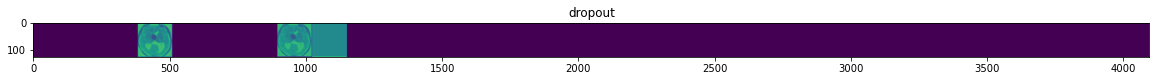

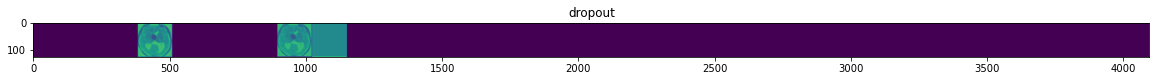

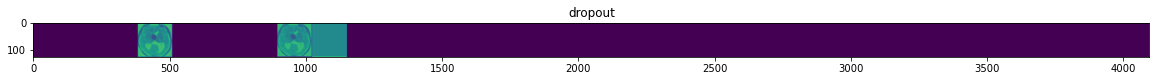

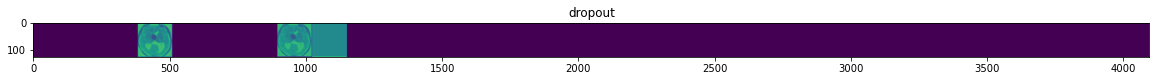

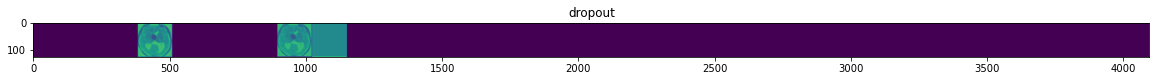

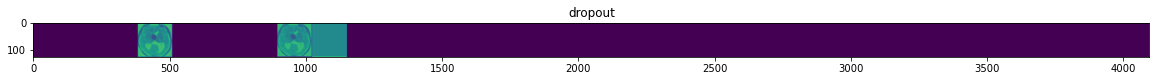

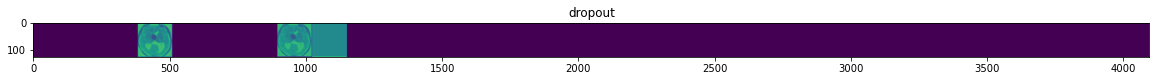

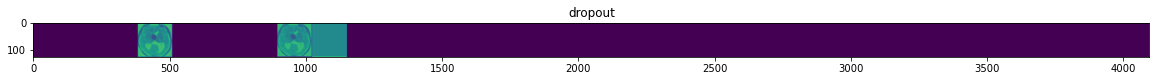

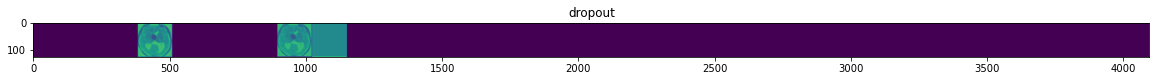

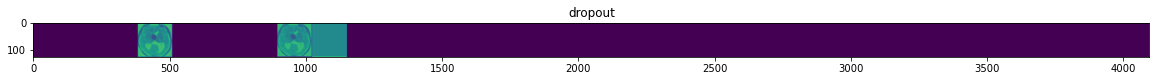

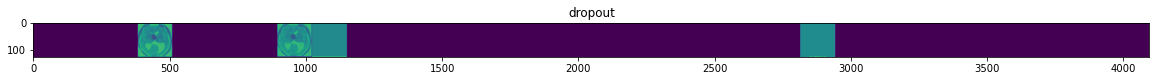

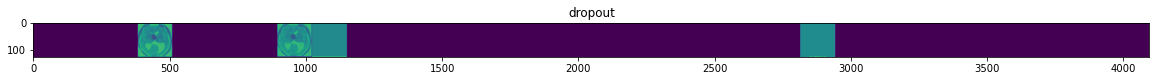

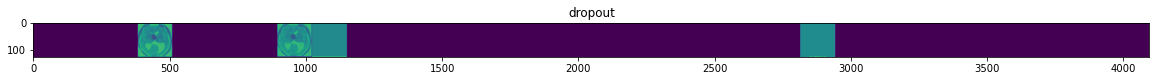

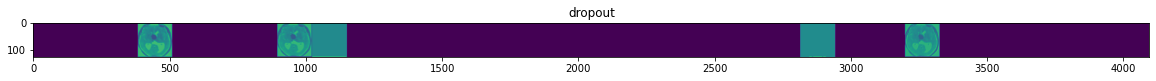

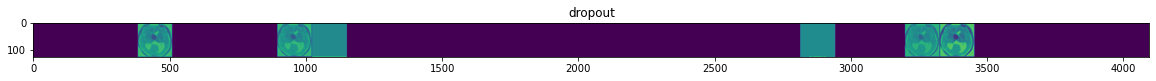

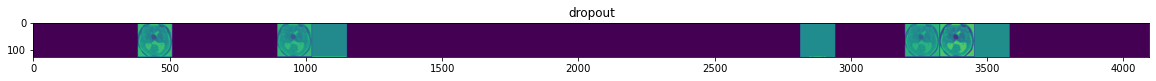

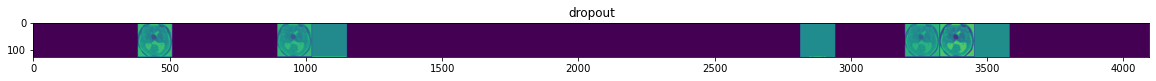

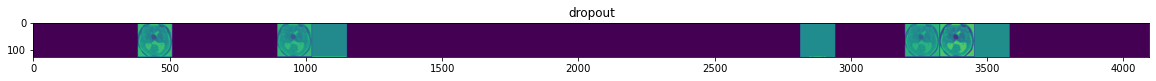

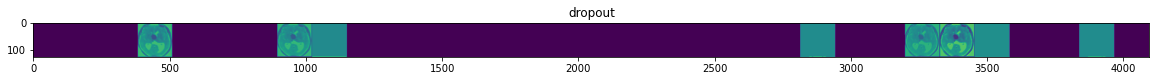

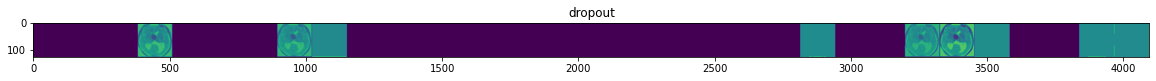

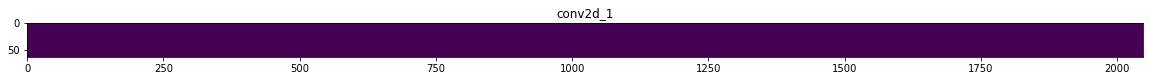

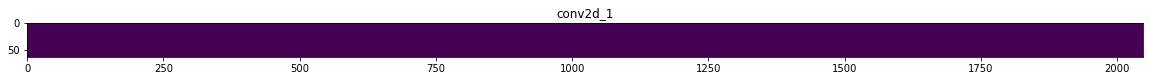

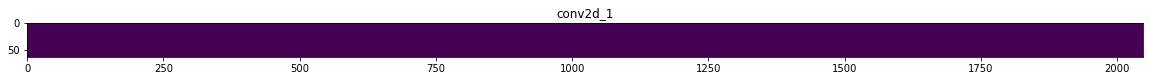

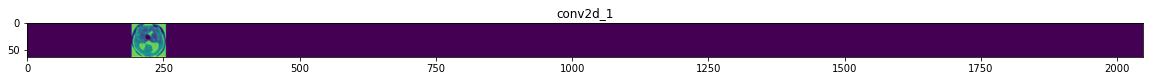

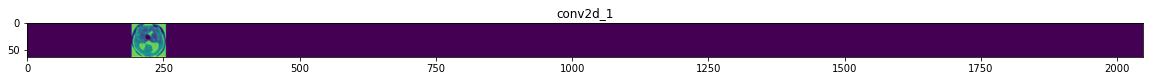

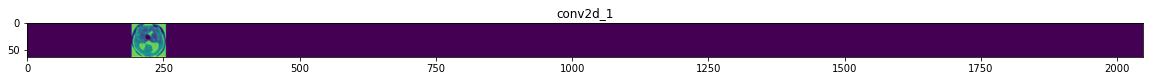

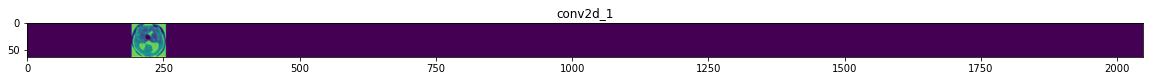

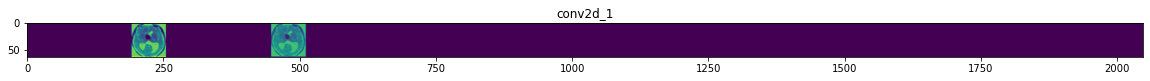

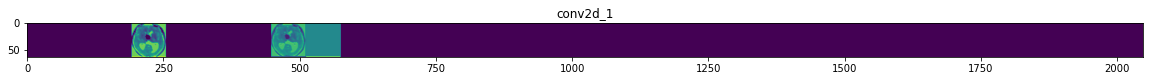

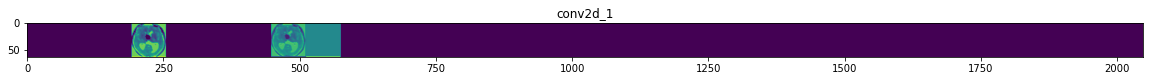

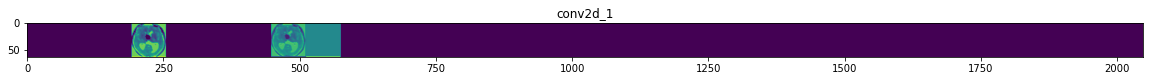

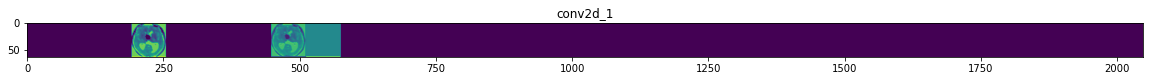

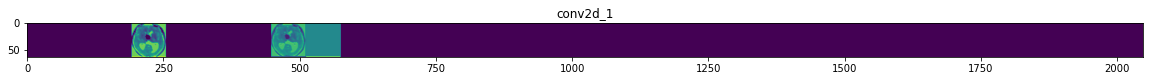

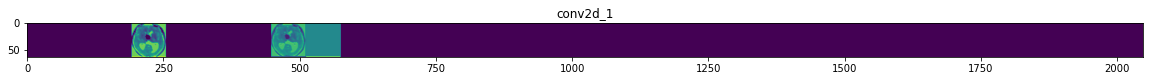

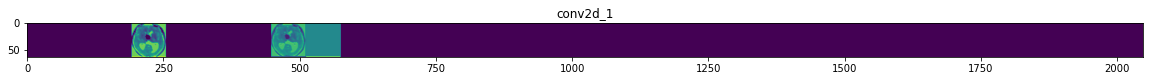

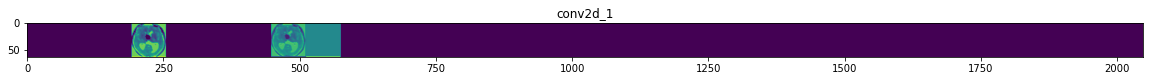

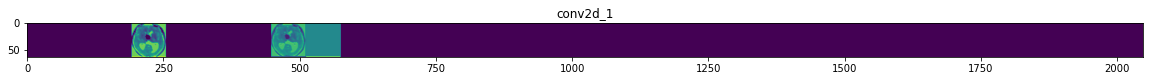

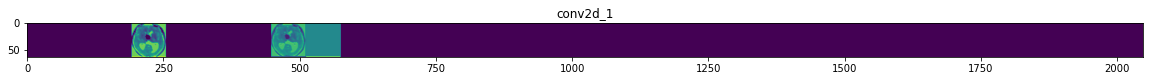

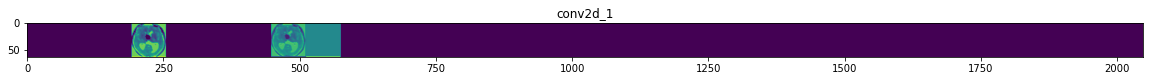

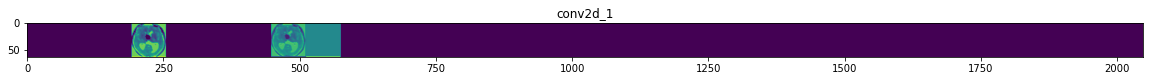

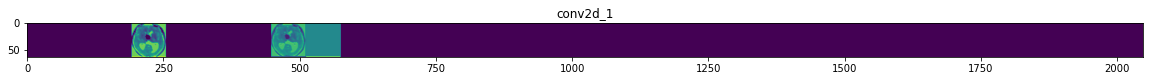

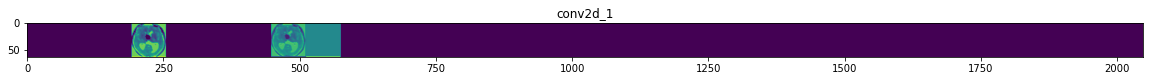

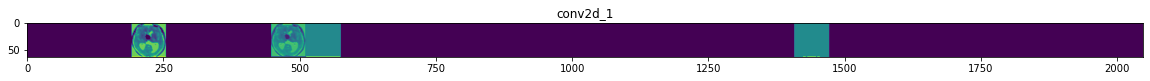

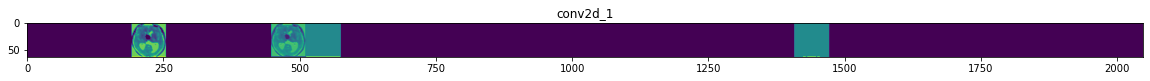

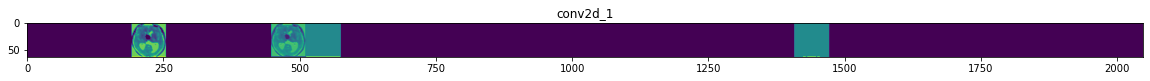

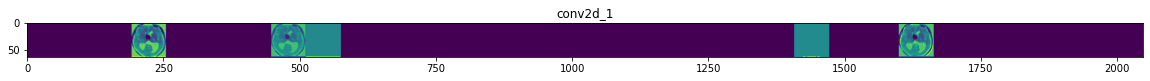

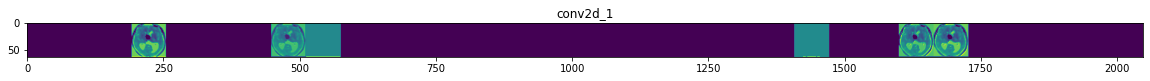

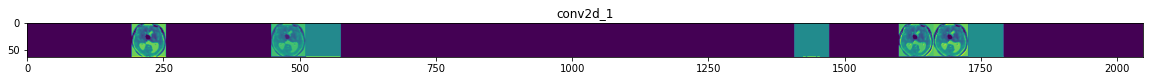

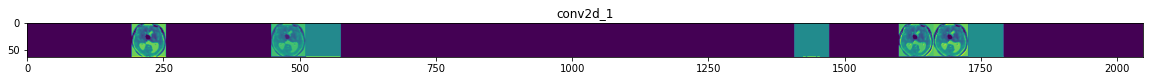

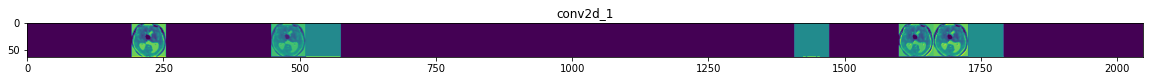

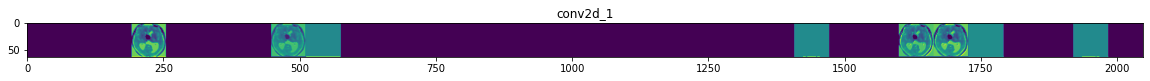

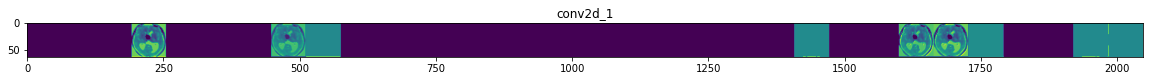

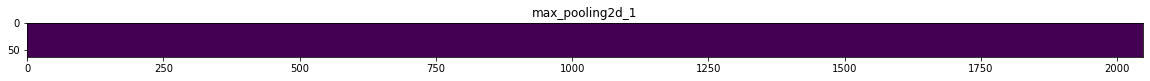

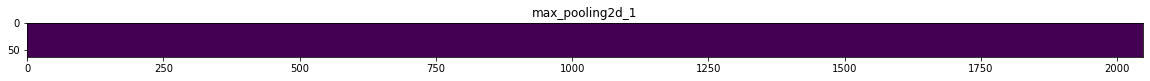

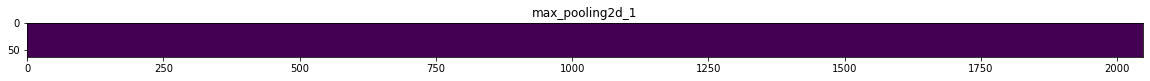

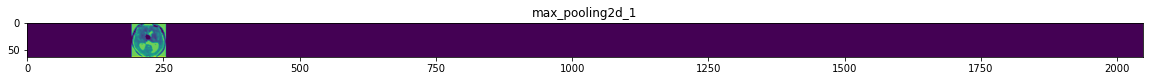

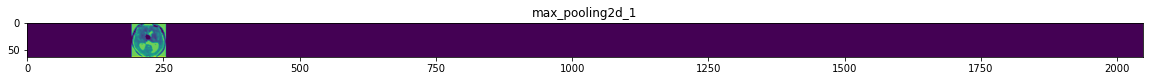

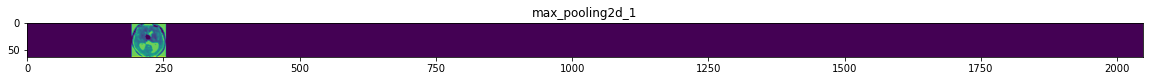

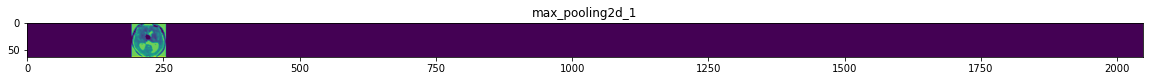

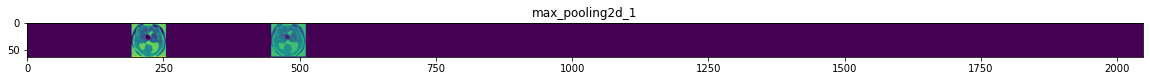

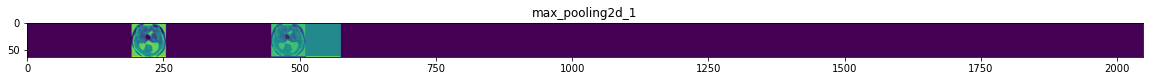

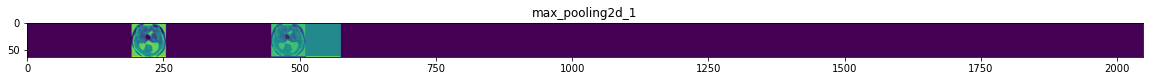

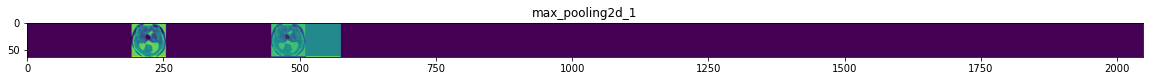

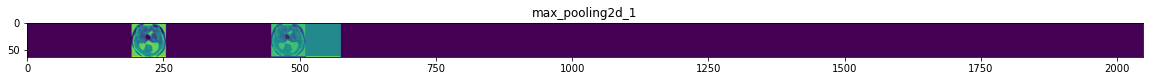

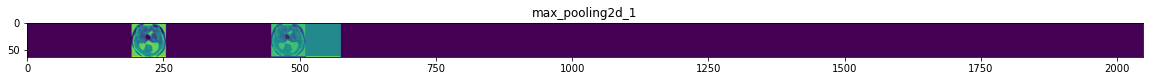

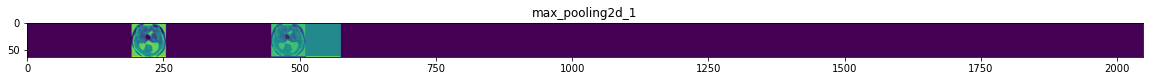

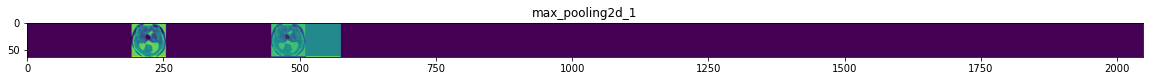

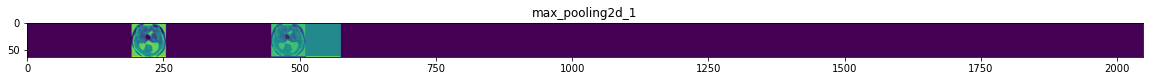

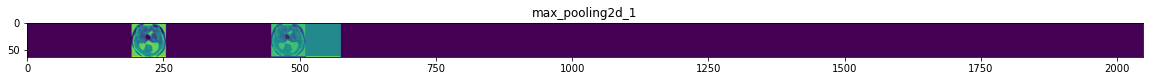

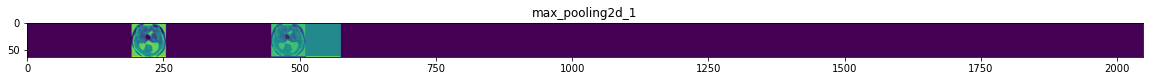

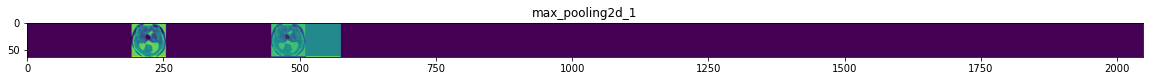

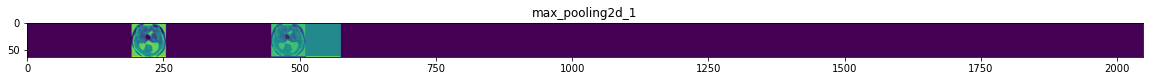

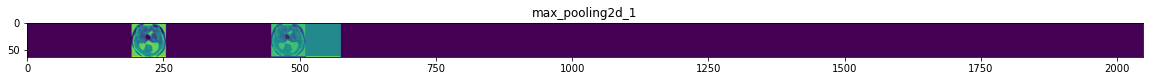

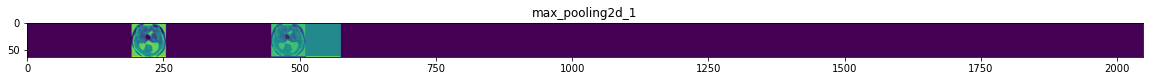

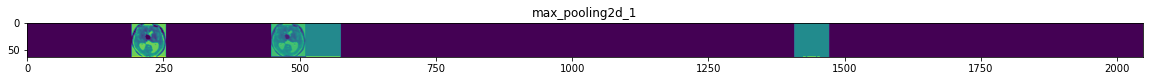

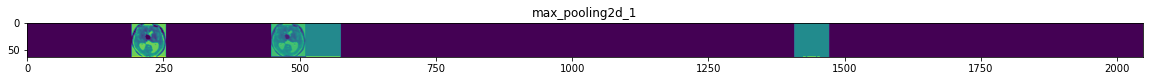

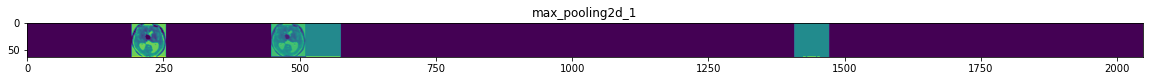

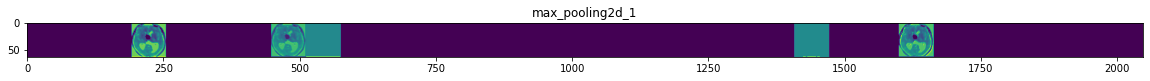

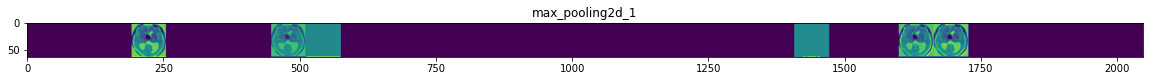

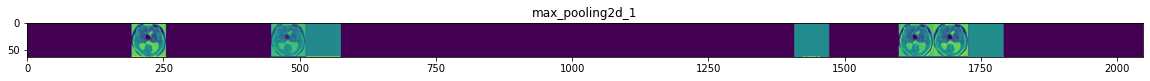

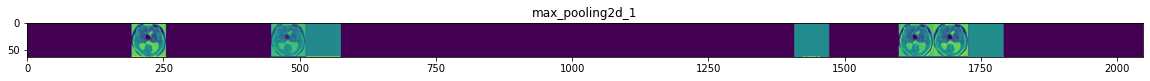

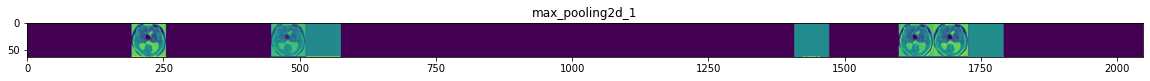

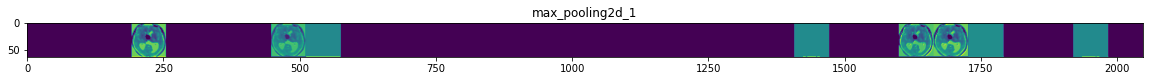

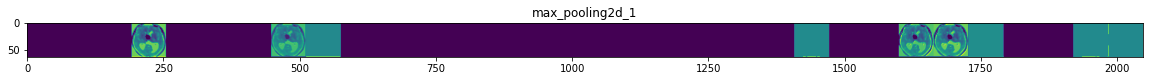

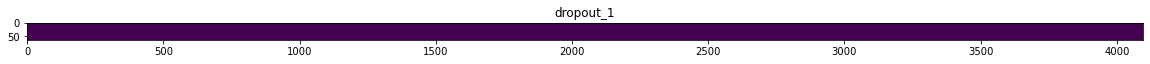

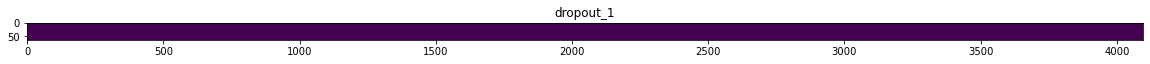

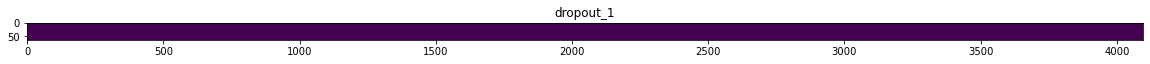

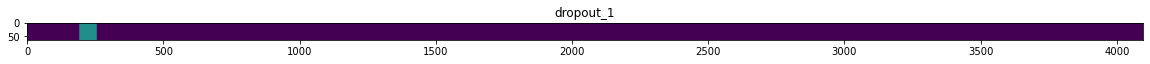

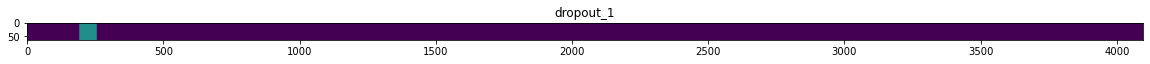

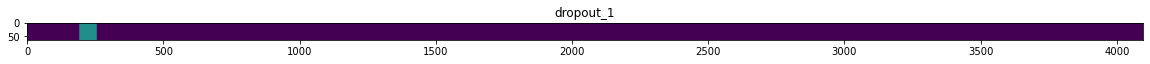

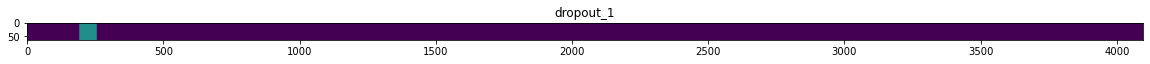

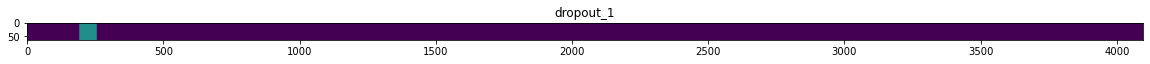

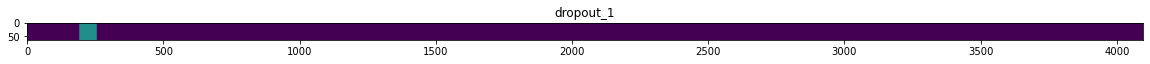

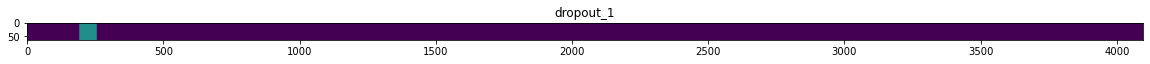

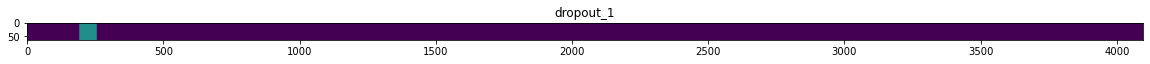

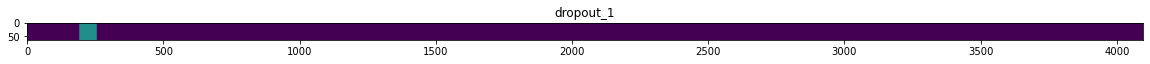

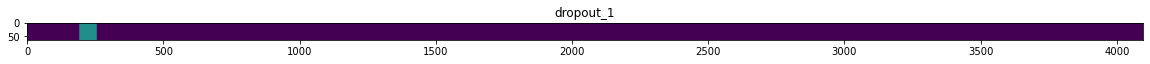

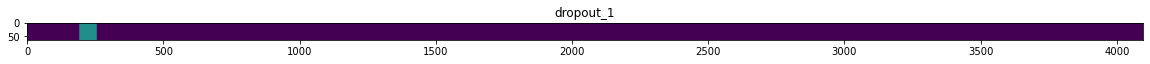

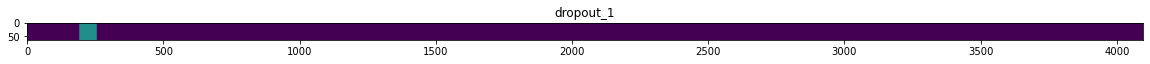

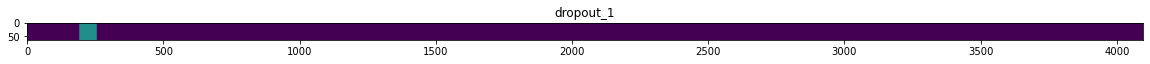

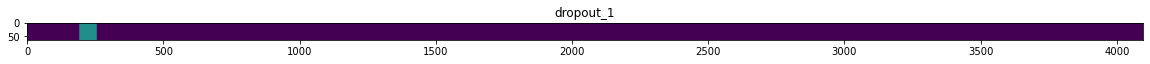

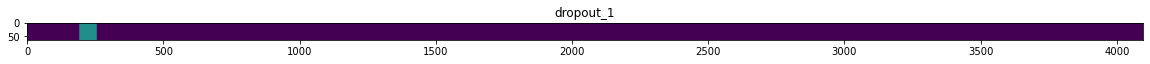

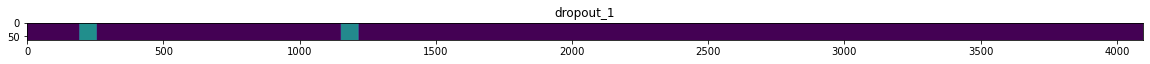

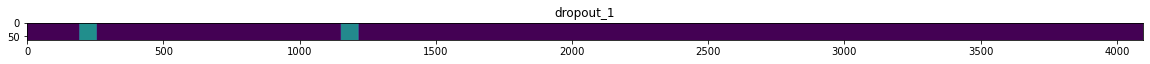

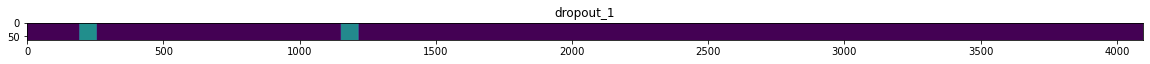

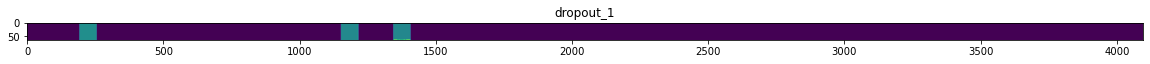

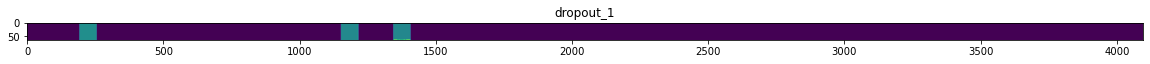

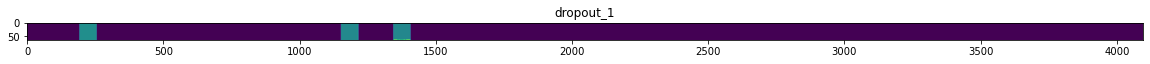

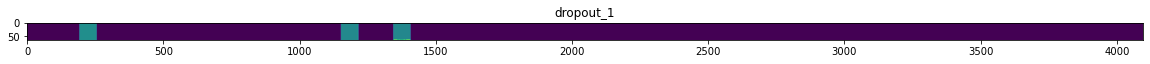

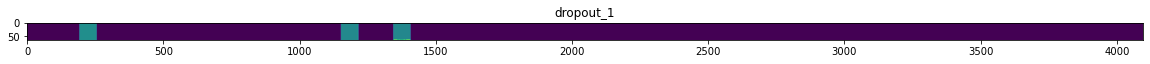

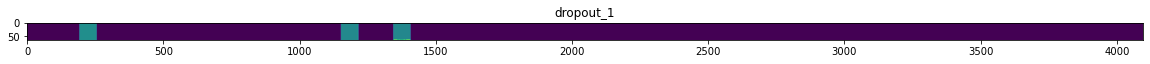

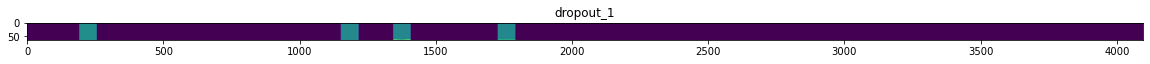

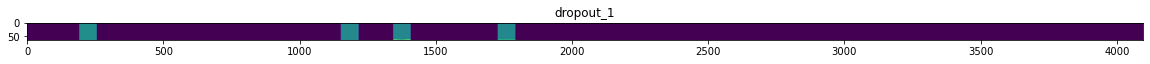

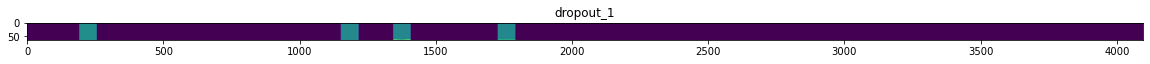

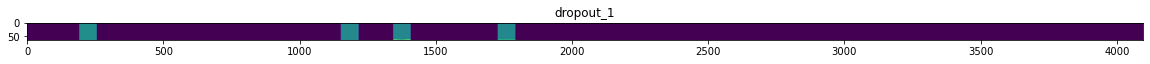

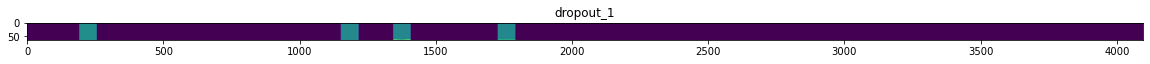

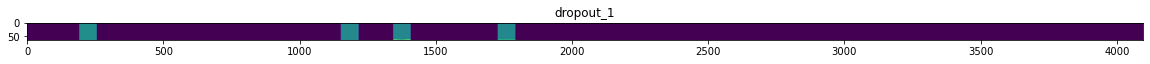

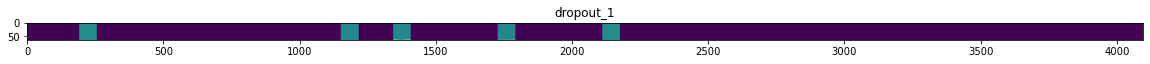

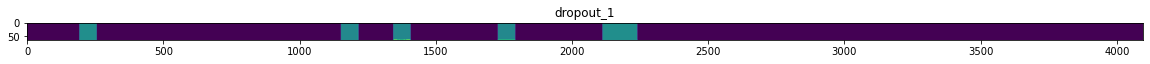

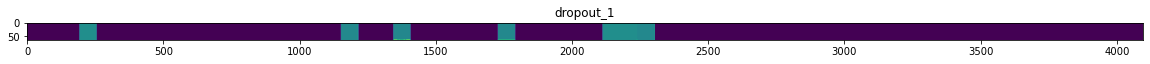

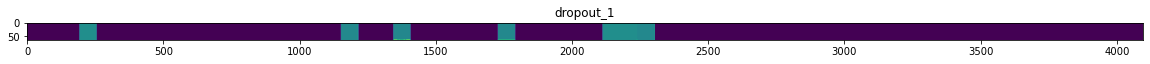

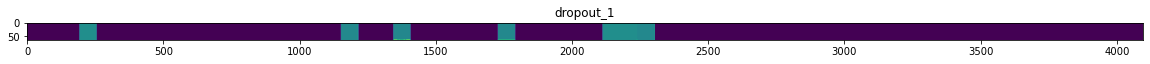

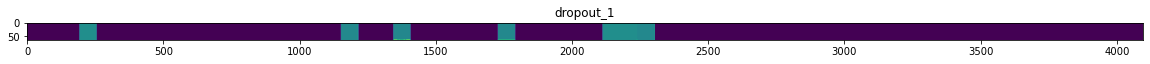

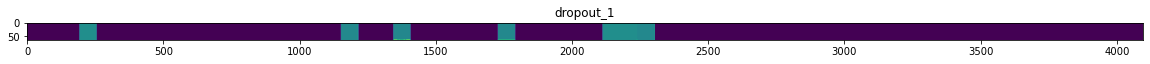

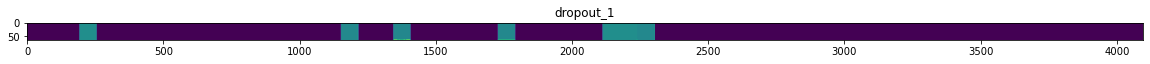

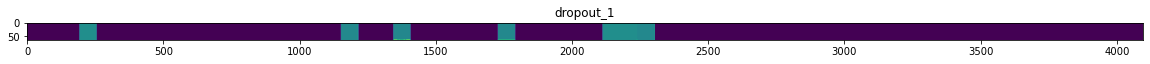

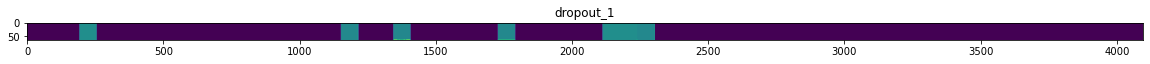

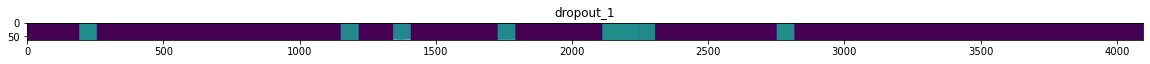

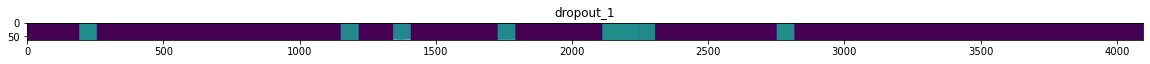

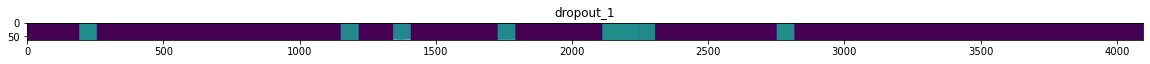

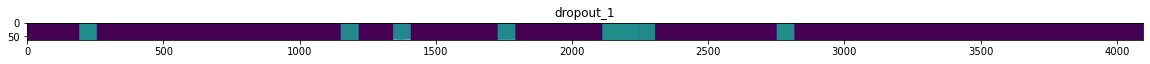

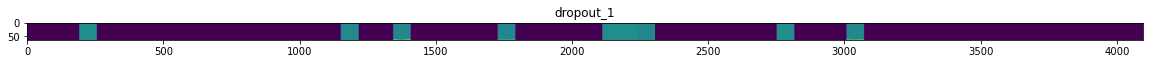

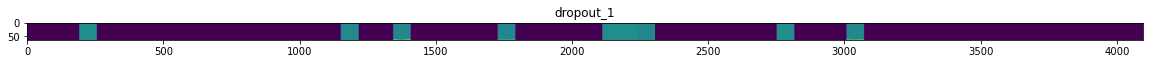

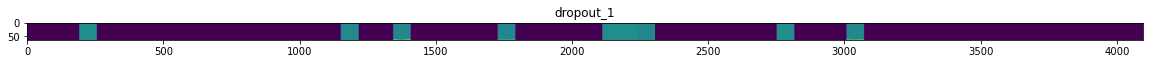

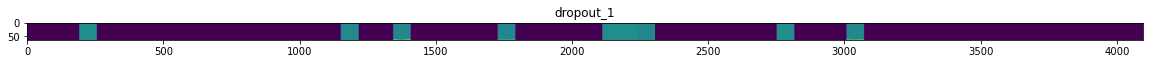

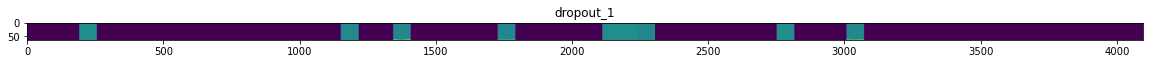

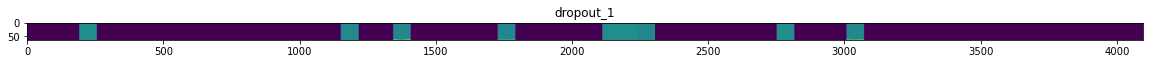

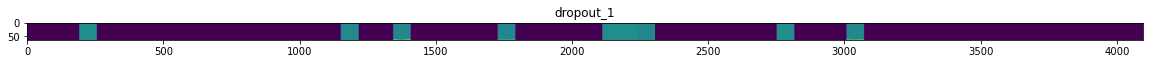

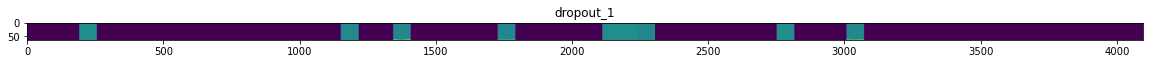

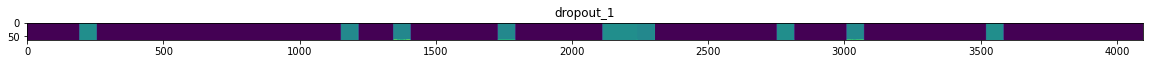

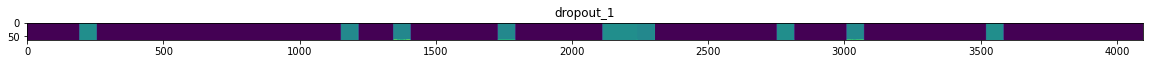

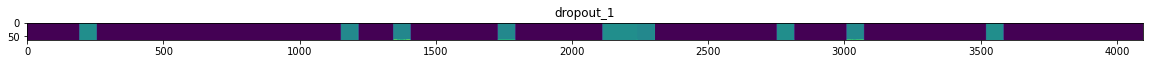

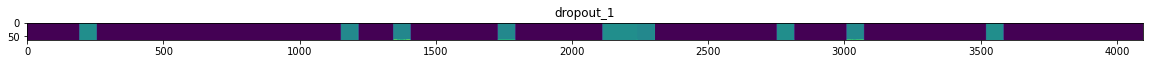

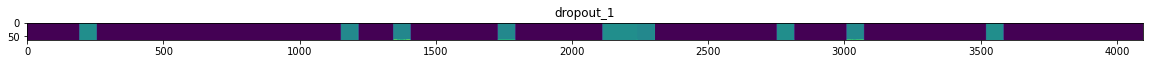

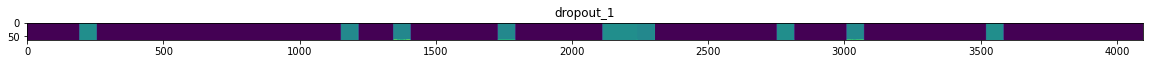

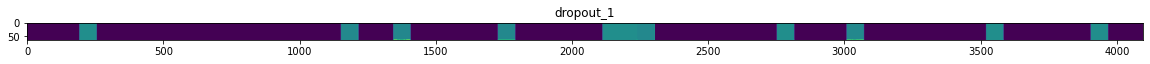

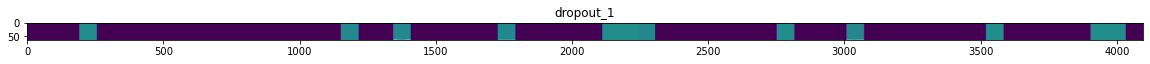

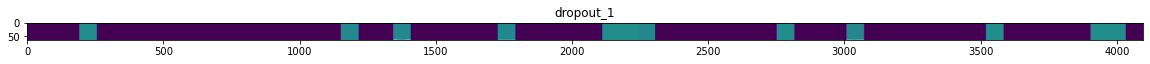

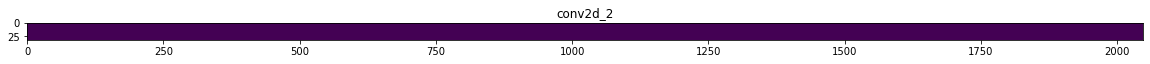

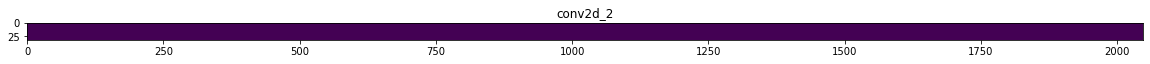

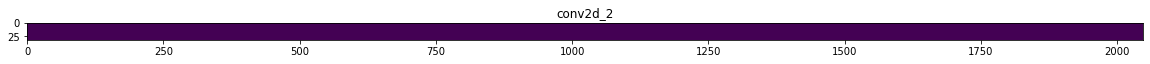

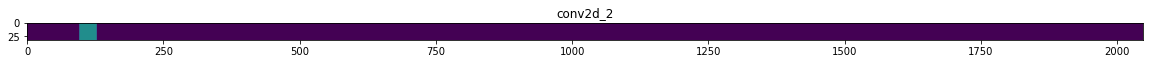

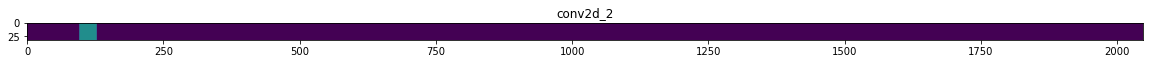

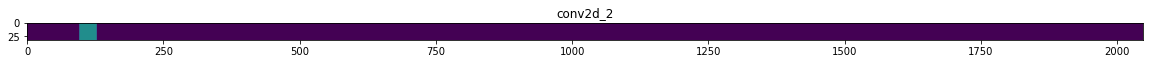

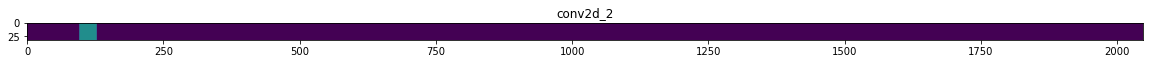

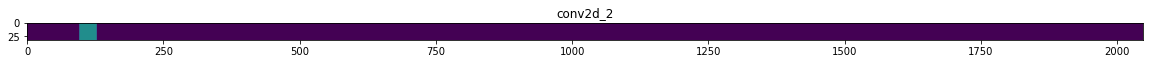

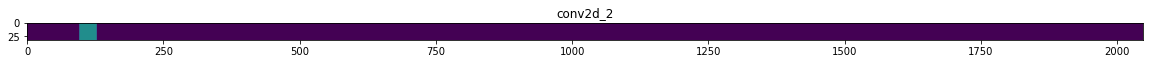

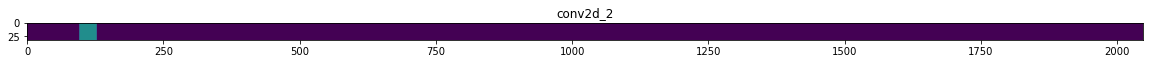

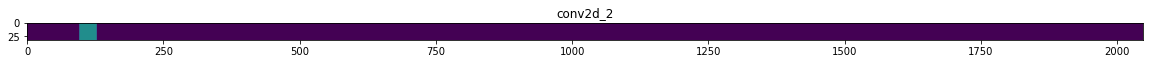

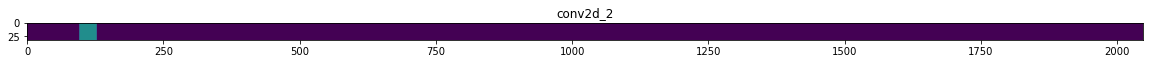

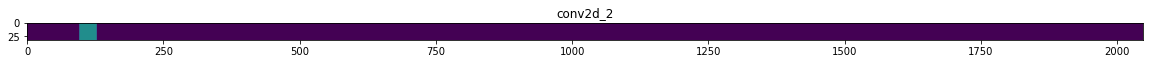

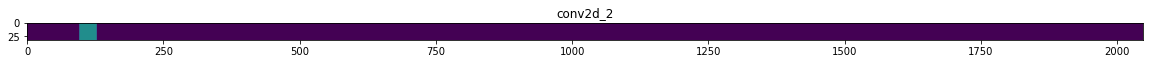

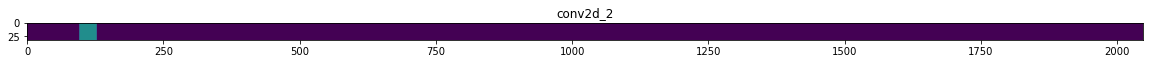

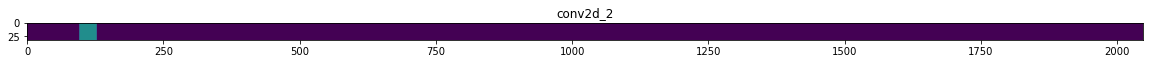

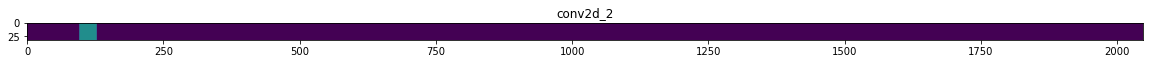

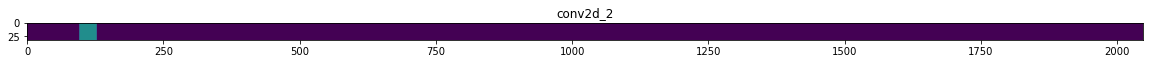

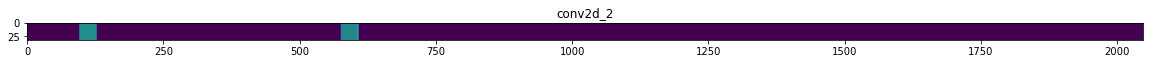

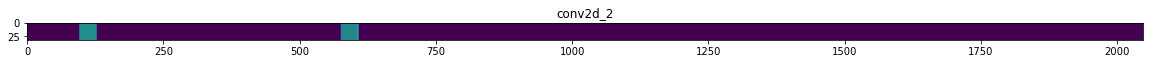

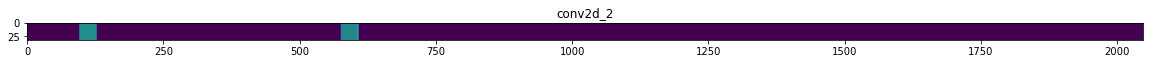

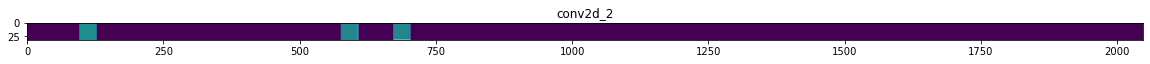

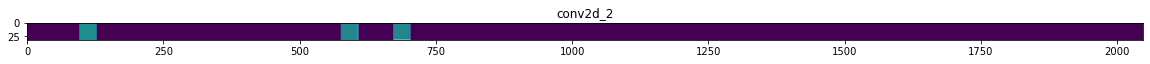

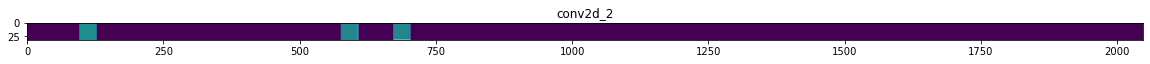

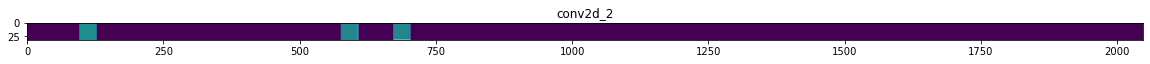

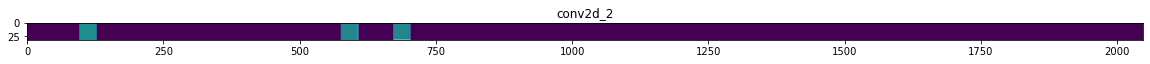

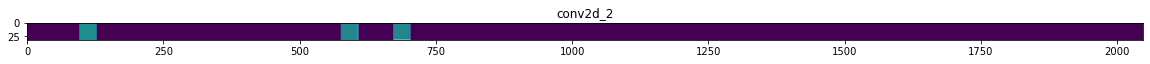

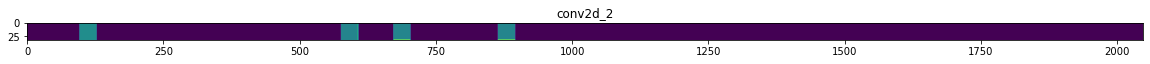

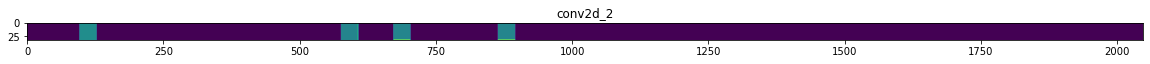

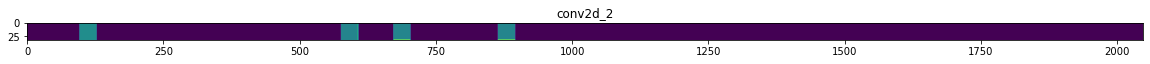

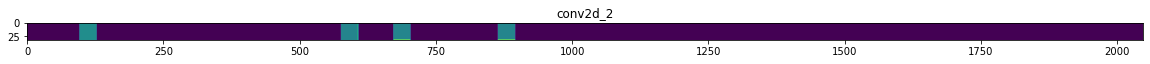

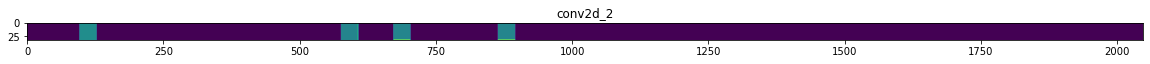

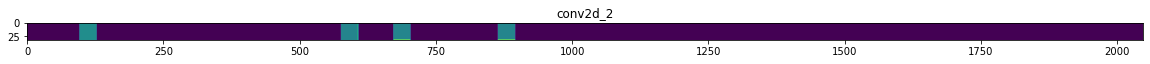

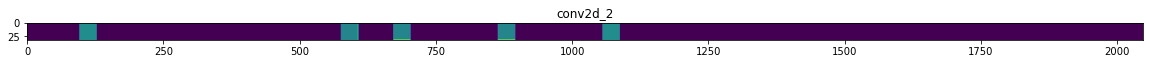

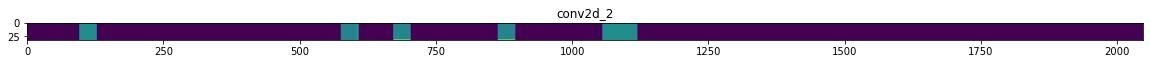

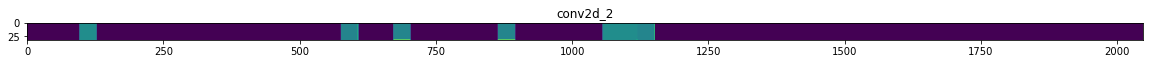

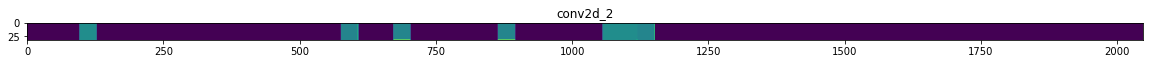

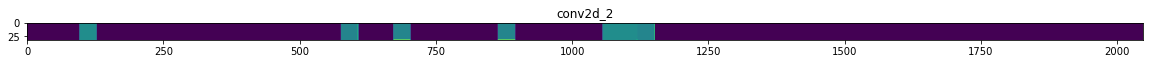

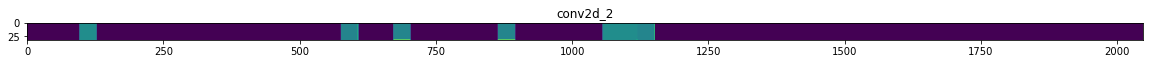

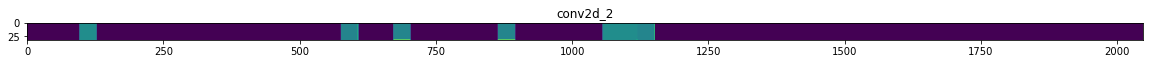

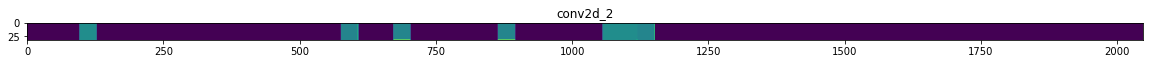

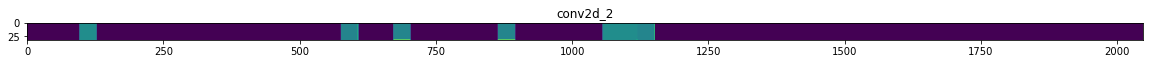

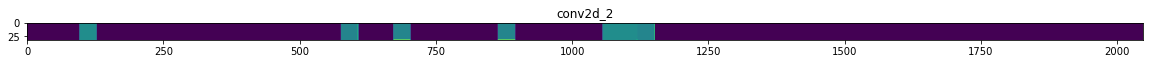

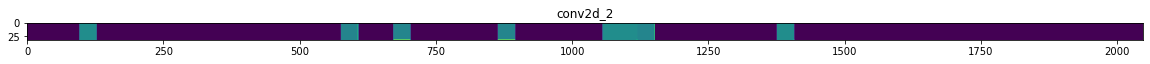

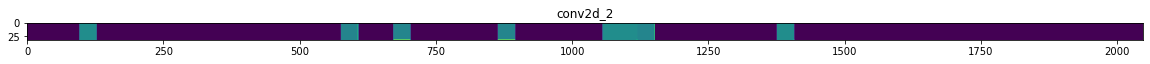

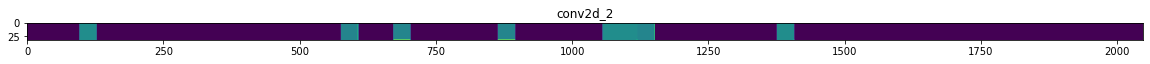

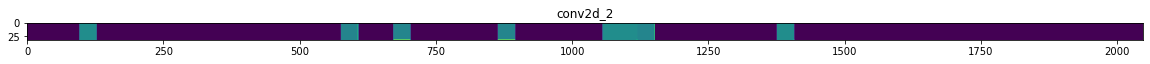

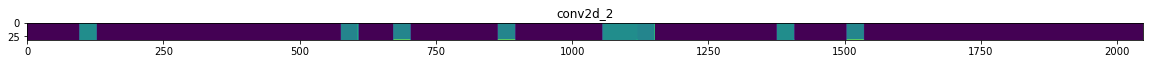

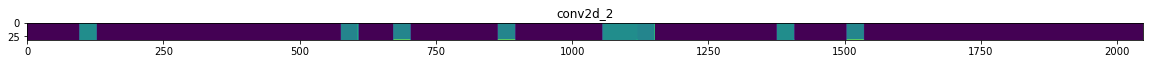

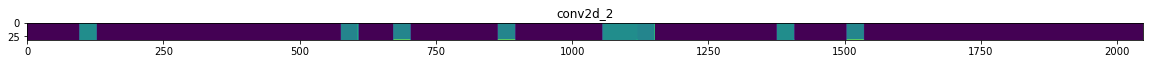

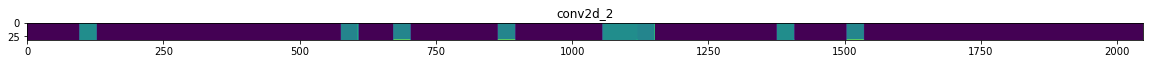

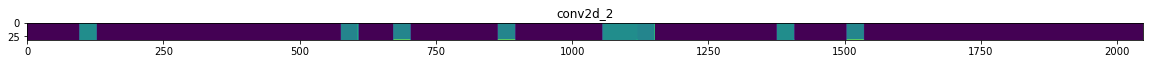

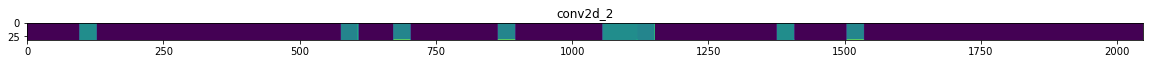

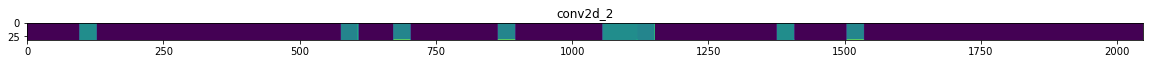

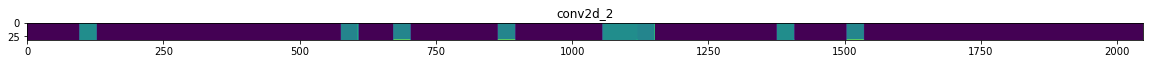

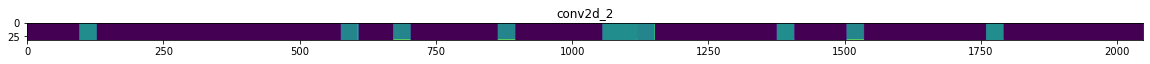

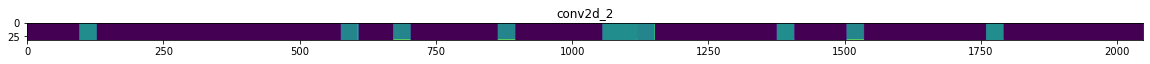

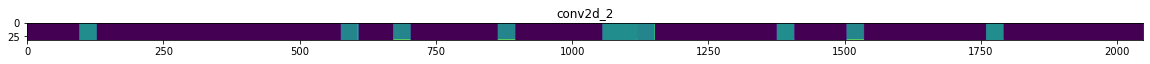

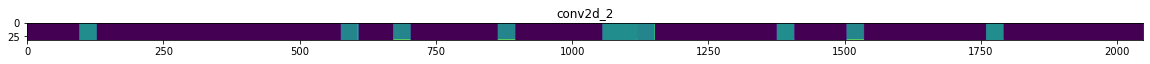

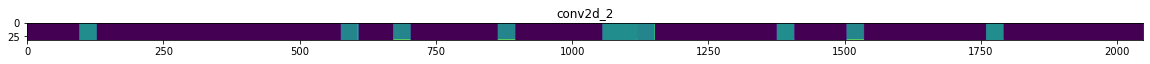

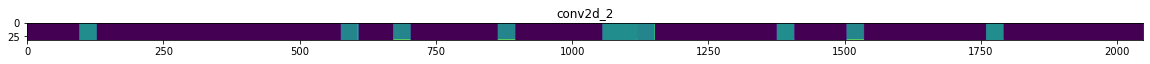

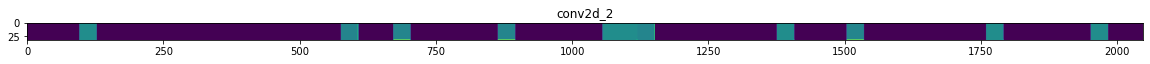

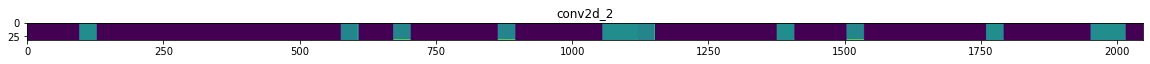

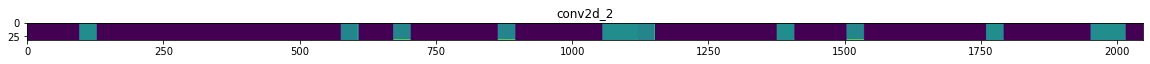

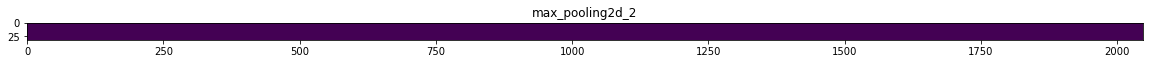

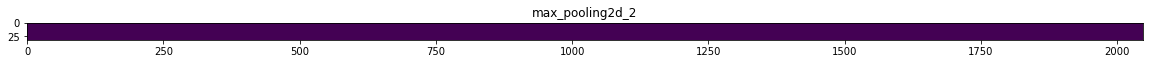

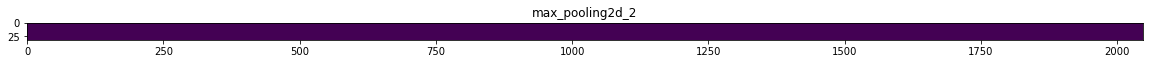

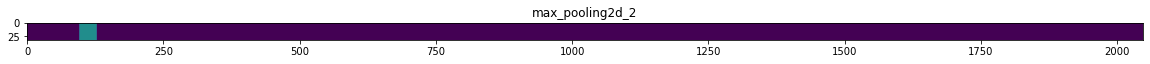

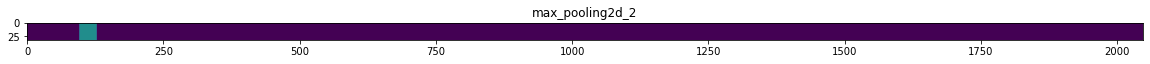

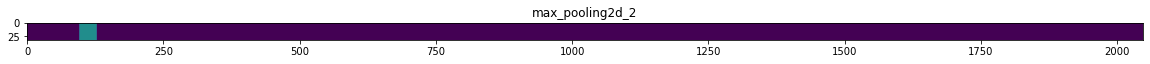

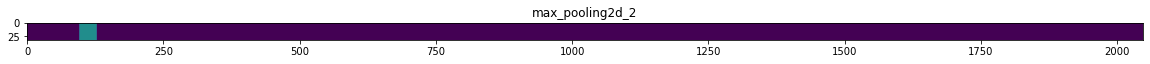

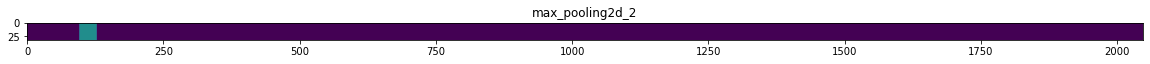

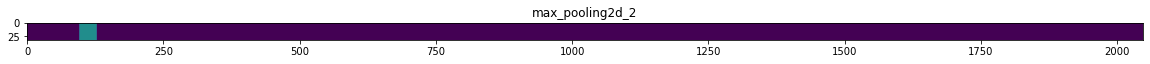

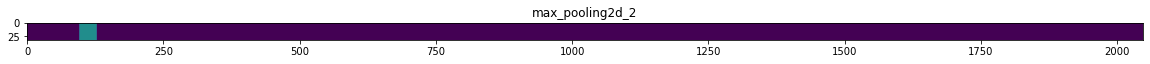

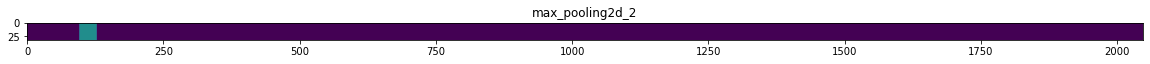

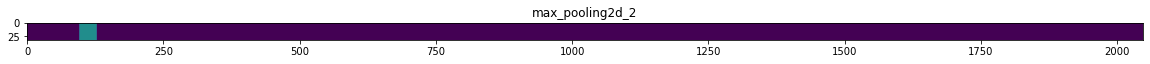

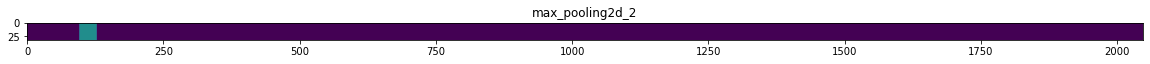

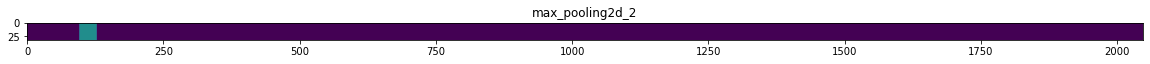

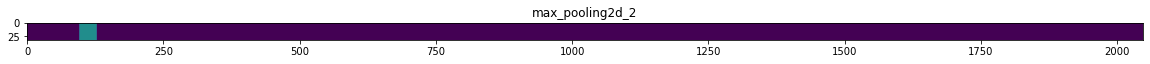

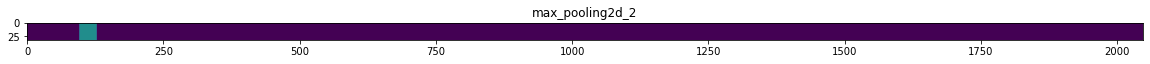

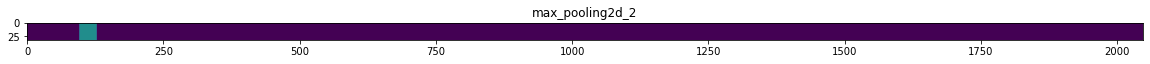

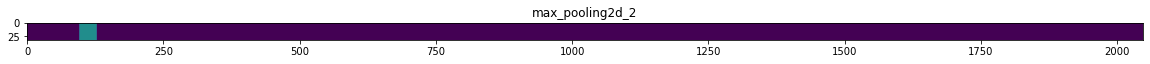

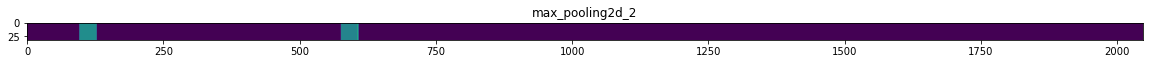

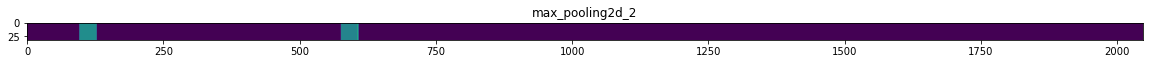

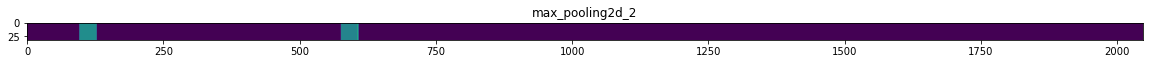

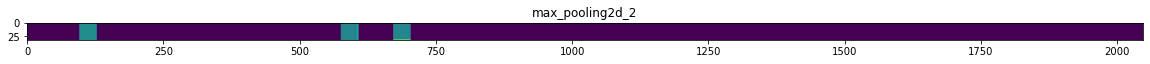

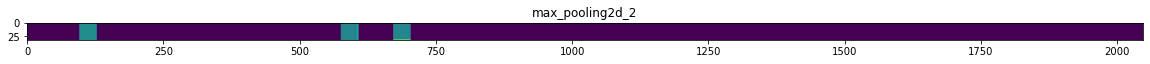

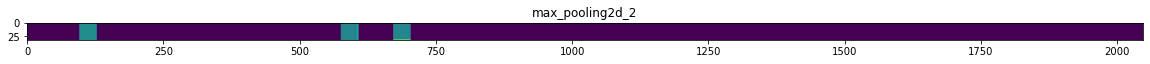

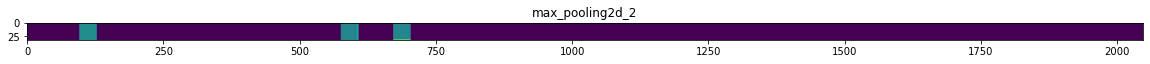

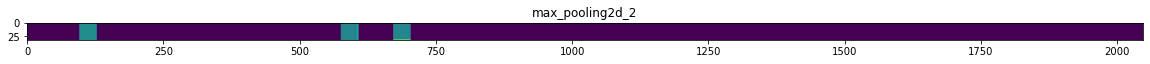

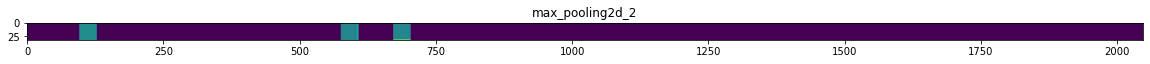

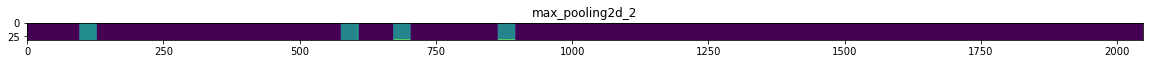

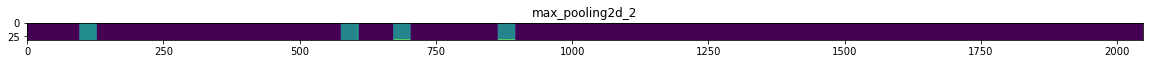

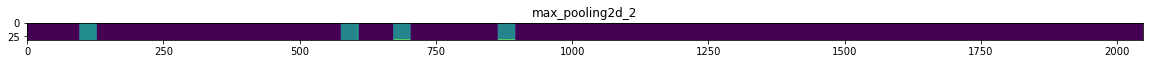

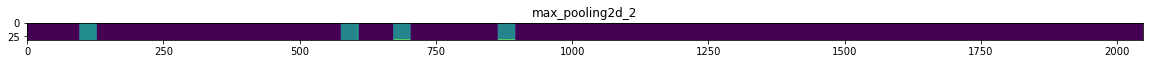

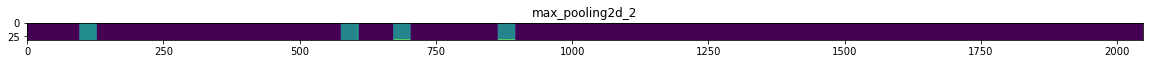

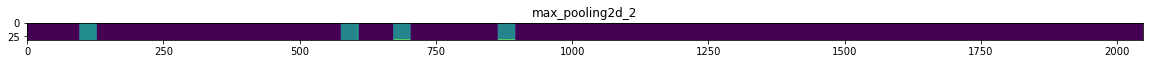

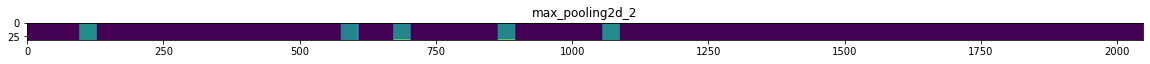

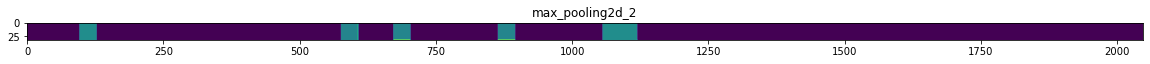

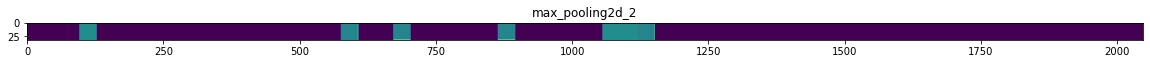

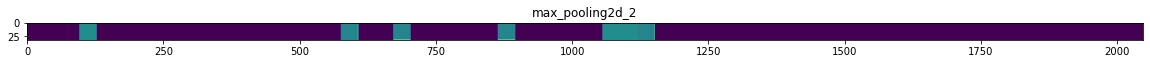

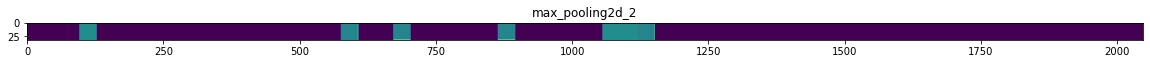

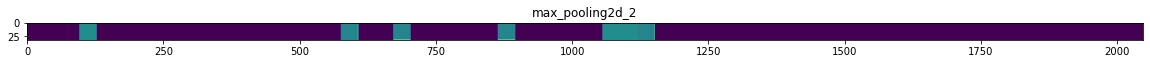

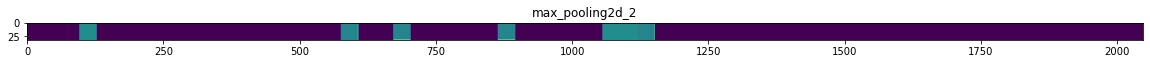

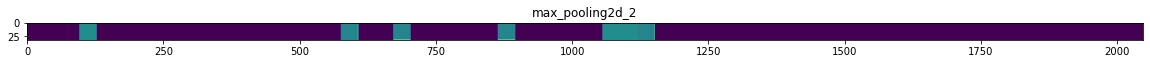

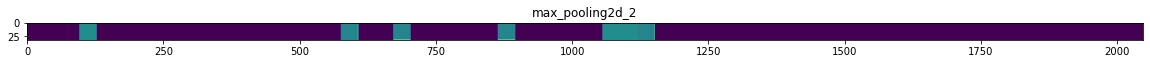

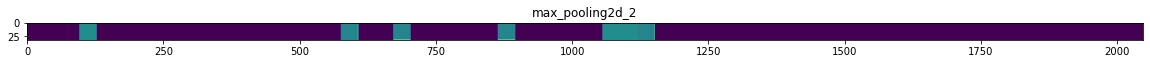

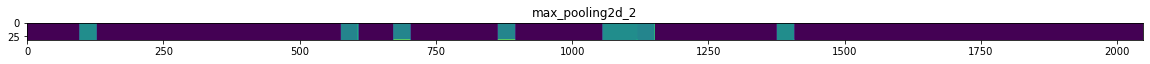

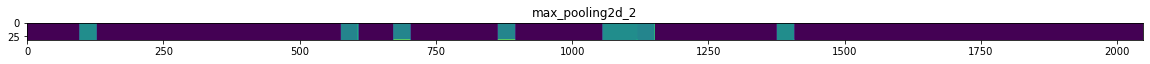

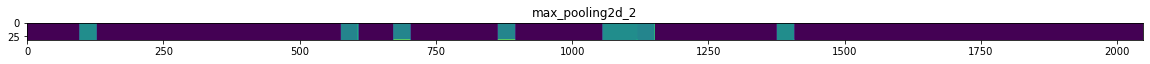

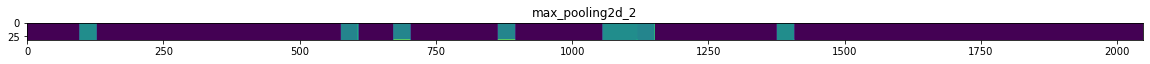

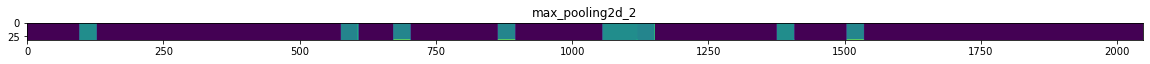

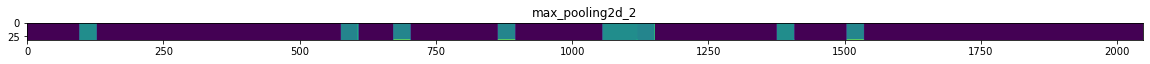

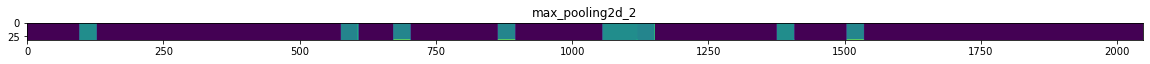

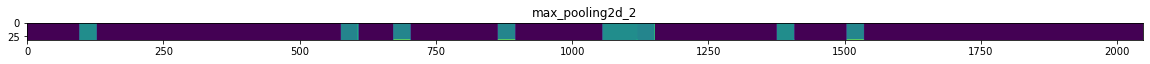

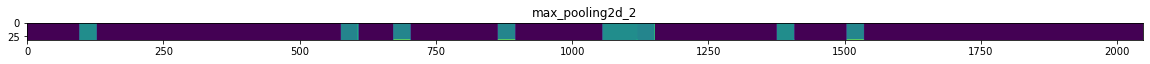

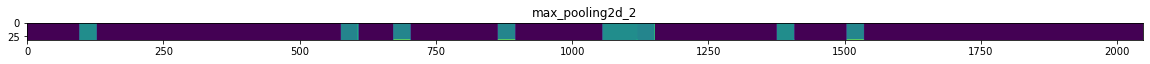

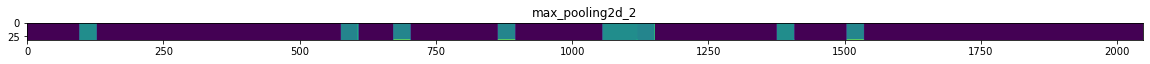

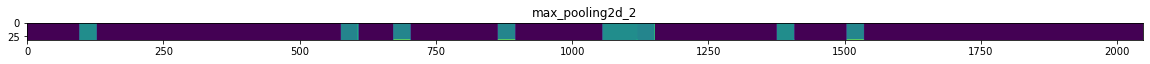

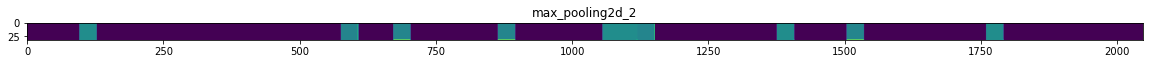

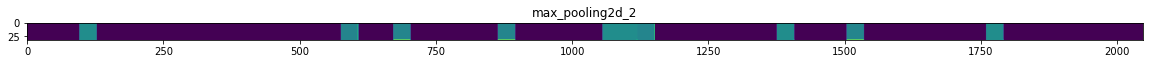

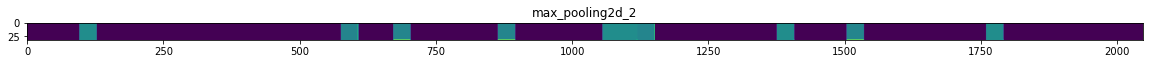

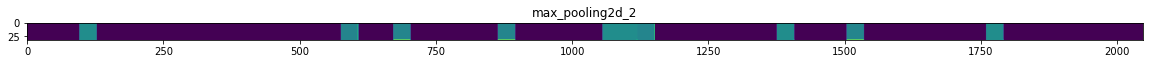

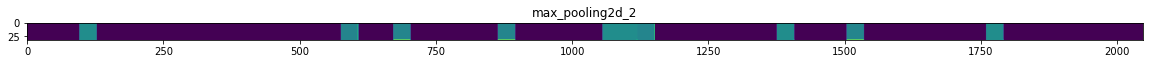

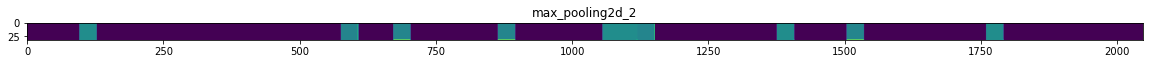

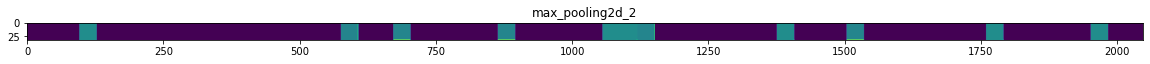

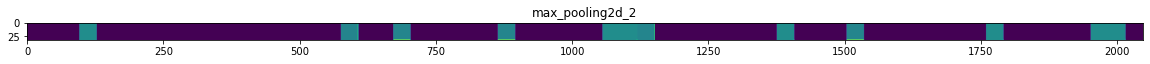

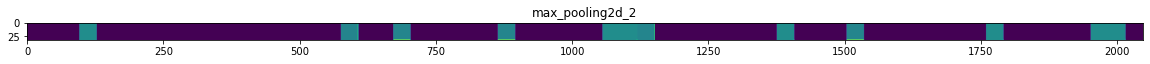

In [49]:
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    print(feature_map.shape)
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size       = feature_map.shape[ 1]
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            # Tile each filter into a horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
            
            # Display the grid
            scale = 20. / n_features
            plt.figure( figsize=(scale * n_features, scale) )
            plt.title ( layer_name )
            plt.grid  ( False )
            plt.imshow( display_grid, aspect='auto', cmap='viridis' )
